# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import VotingClassifier

#About The Dataset :
age - Age of patient in years

gender-Gender of the person sex—(1=male; 0=female).

height-Height of the person in cm

weight- Weight of the person in kgs

ap high-Systolic blood pressure, the top number, measures the force your heart exerts on the walls of your arteries each time it beats

ap lo-Diastolic blood pressure ,the bottom number measures the pressure on the walls of your arteries between heartbeats.

cholesterol-Cholesterol is a wax like substance present in our blood.

gluc -Blood carries glucose to all of our body’s cells to
use for energy. (gluc-1: normal,2: prediabetic,3:diabetic)

smoke - Do they smoke or not?Values are in binary

alco -Consumption of alcohol.

active-Physical activity of a person.

cardio-The target variable which defines the presence or absence of cardiovascular disease.


In [2]:
df = pd.read_csv('cardio_train.csv',sep=';')

In [3]:
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.shape

(70000, 13)

In [5]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

# Check Null values

In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Checking for duplicate rows

In [7]:
df[df.duplicated()]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Computing the correlation matrix

In [9]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


# Cross Tab of all Features vs Cardio

In [10]:
pd.crosstab(df.age,df.cardio)

cardio,0,1
age,,
10798,1,0
10859,1,0
10878,1,0
10964,1,0
14275,0,1
...,...,...
23687,0,1
23690,0,1
23692,0,1


In [11]:
pd.crosstab(df.gender,df.cardio)

cardio,0,1
gender,,
1,22914,22616
2,12107,12363


<AxesSubplot:xlabel='gender'>

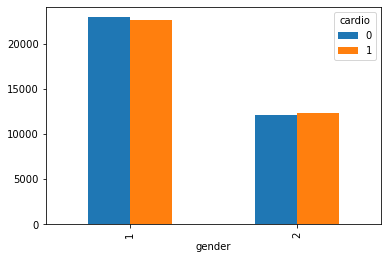

In [14]:
pd.crosstab(df.gender,df.cardio).plot(kind='bar')

In [15]:
pd.crosstab(df.height,df.cardio)

cardio,0,1
height,,
55,0,1
57,0,1
59,1,0
60,1,0
64,1,0
...,...,...
197,1,3
198,5,9
200,0,1


In [16]:
pd.crosstab(df.weight,df.cardio)

cardio,0,1
weight,,
10.0,0,1
11.0,0,1
21.0,0,1
22.0,1,0
23.0,1,0
...,...,...
178.0,2,1
180.0,0,4
181.0,0,1


In [17]:
pd.crosstab(df.ap_hi,df.cardio)

cardio,0,1
ap_hi,,
-150,0,1
-140,0,1
-120,1,1
-115,1,0
-100,2,0
...,...,...
11020,0,1
11500,0,1
13010,1,1


In [18]:
pd.crosstab(df.ap_lo,df.cardio)

cardio,0,1
ap_lo,,
-70,0,1
0,15,6
1,1,0
6,2,0
7,2,0
...,...,...
9011,0,2
9100,0,1
9800,1,0


In [19]:
pd.crosstab(df.cholesterol,df.cardio)

cardio,0,1
cholesterol,,
1,29330,23055
2,3799,5750
3,1892,6174


<AxesSubplot:xlabel='cholesterol'>

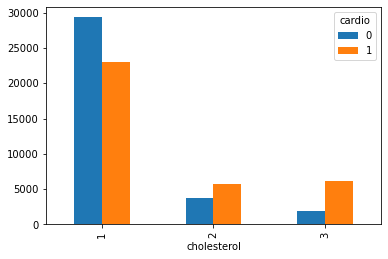

In [20]:
pd.crosstab(df.cholesterol,df.cardio).plot(kind='bar')

In [21]:
pd.crosstab(df.gluc,df.cardio)

cardio,0,1
gluc,,
1,30894,28585
2,2112,3078
3,2015,3316


<AxesSubplot:xlabel='gluc'>

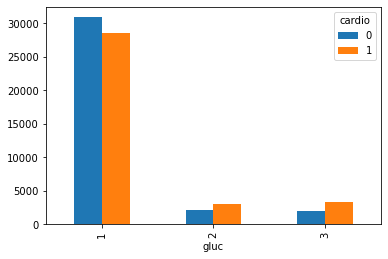

In [22]:
pd.crosstab(df.gluc,df.cardio).plot(kind='bar')

In [23]:
pd.crosstab(df.smoke,df.cardio)

cardio,0,1
smoke,,
0,31781,32050
1,3240,2929


<AxesSubplot:xlabel='smoke'>

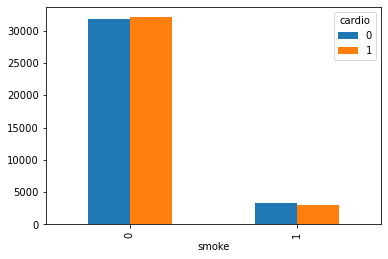

In [24]:
pd.crosstab(df.smoke,df.cardio).plot(kind='bar')

In [25]:
pd.crosstab(df.alco,df.cardio)

cardio,0,1
alco,,
0,33080,33156
1,1941,1823


<AxesSubplot:xlabel='alco'>

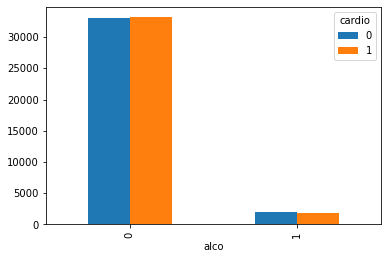

In [26]:
pd.crosstab(df.alco,df.cardio).plot(kind='bar')

In [27]:
pd.crosstab(df.active,df.cardio)

cardio,0,1
active,,
0,6378,7361
1,28643,27618


<AxesSubplot:xlabel='active'>

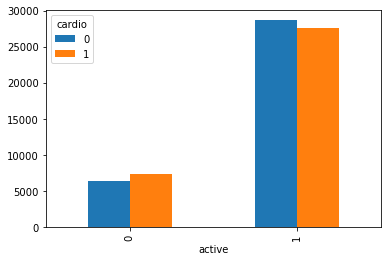

In [33]:
pd.crosstab(df.active,df.cardio).plot(kind='bar')

# Data Visualization

# For Cardio

0 - noncardio, 1 - cardio
0    35021
1    34979
Name: cardio, dtype: int64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

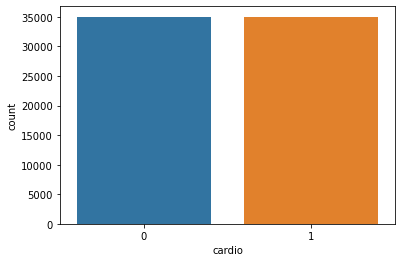

In [28]:
print("0 - noncardio, 1 - cardio")
x=(df.cardio.value_counts())
print(x)
sns.countplot(df["cardio"])

# For Gender

1: normal, 2: above normal, 3: well above normal
1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64


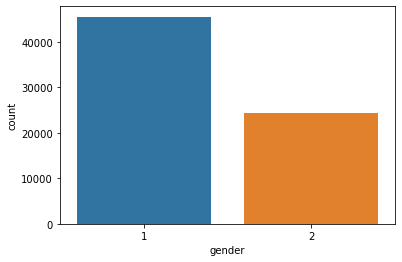

In [30]:
print("1: normal, 2: above normal, 3: well above normal")
x=(df.cholesterol.value_counts())
print(x)
p = sns.countplot(data=df, x="gender")
plt.show()

# For Cholesterol

1: normal, 2: above normal, 3: well above normal
1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64


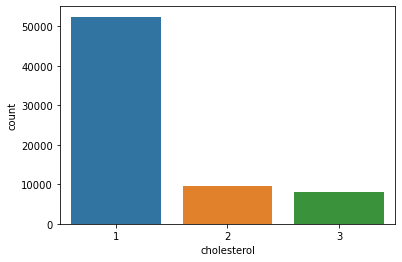

In [14]:
print("1: normal, 2: above normal, 3: well above normal")
x=(df.cholesterol.value_counts())
print(x)
p = sns.countplot(data=df, x="cholesterol")
plt.show()

# For Smoke

0 - Non Smoker , 1 - Smoker
0    63831
1     6169
Name: smoke, dtype: int64


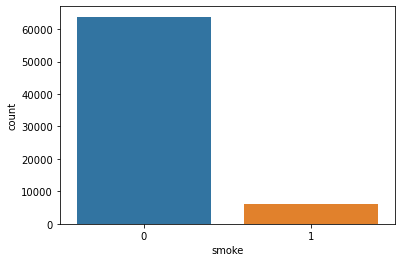

In [31]:
print("0 - Non Smoker , 1 - Smoker")
x=(df.smoke.value_counts())
print(x)
p = sns.countplot(data=df, x="smoke")
plt.show()

# For Alcohol

0 - Non alco , 1 - alco
0    66236
1     3764
Name: alco, dtype: int64


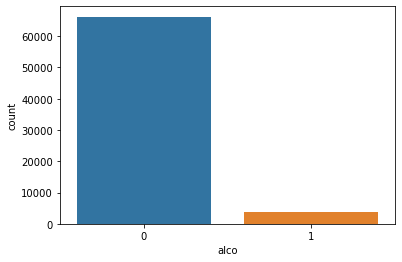

In [13]:
print("0 - Non alco , 1 - alco")
x=(df.alco.value_counts())
print(x)
p = sns.countplot(data=df, x="alco")
plt.show()

# Density distribution for Age

<Figure size 1440x1440 with 0 Axes>

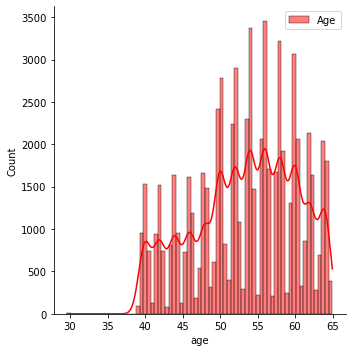

In [32]:
plt.figure(figsize=(20,20))
sns.displot(df.age/365, color="red", kde= True,label="Age")
plt.legend()

# Heart Attack Vs Age

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


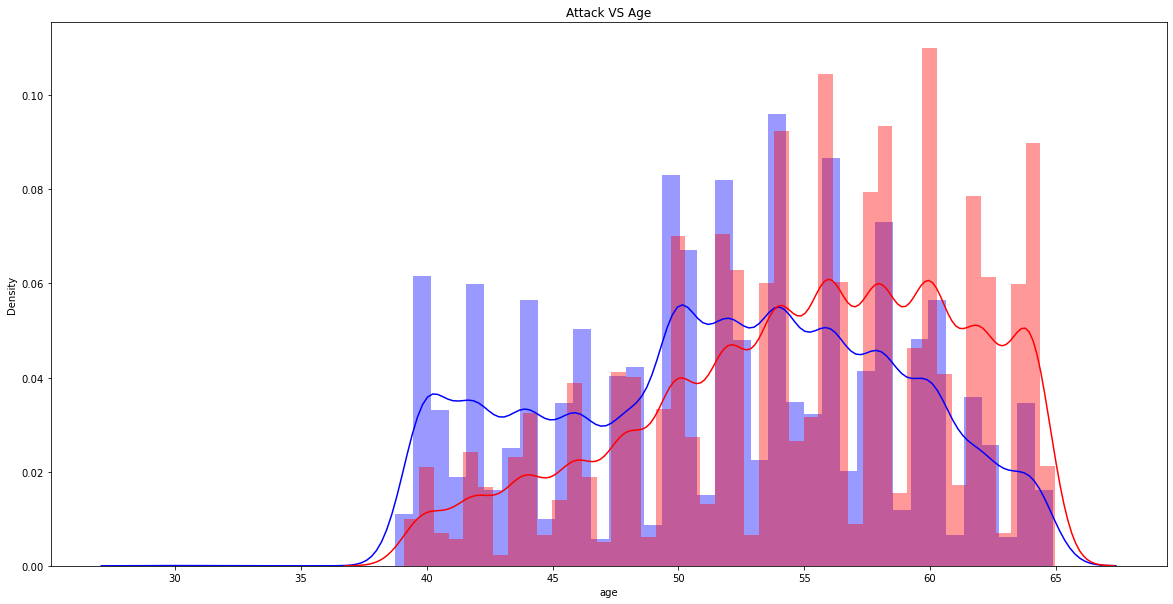

In [33]:
plt.figure(figsize=(20,10))
sns.distplot(df[df['cardio'] == 0]["age"]/365, color='blue',kde=True) 
sns.distplot(df[df['cardio'] == 1]["age"]/365, color='red',kde=True)
plt.title('Attack VS Age')
plt.show()

# Features kde-plot

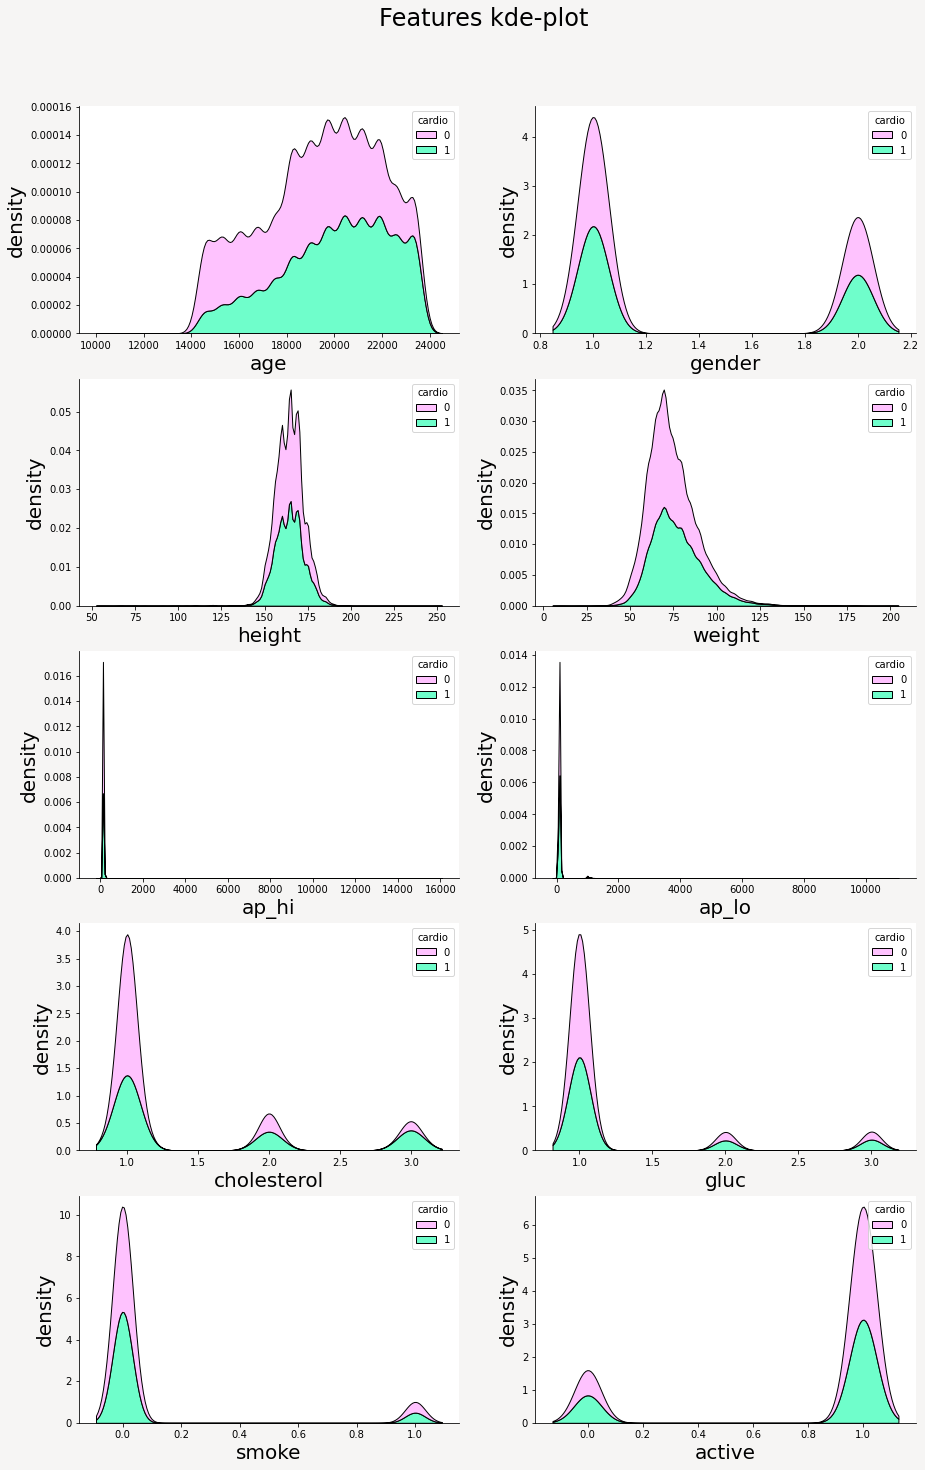

In [10]:
num_feats = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol','gluc','smoke','active']
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(15, 23),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i)
    
    ax = sns.kdeplot(data=df, x=col, hue="cardio", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    i = i +1
plt.suptitle('Features kde-plot' ,fontsize = 24);

# Features count-plot

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


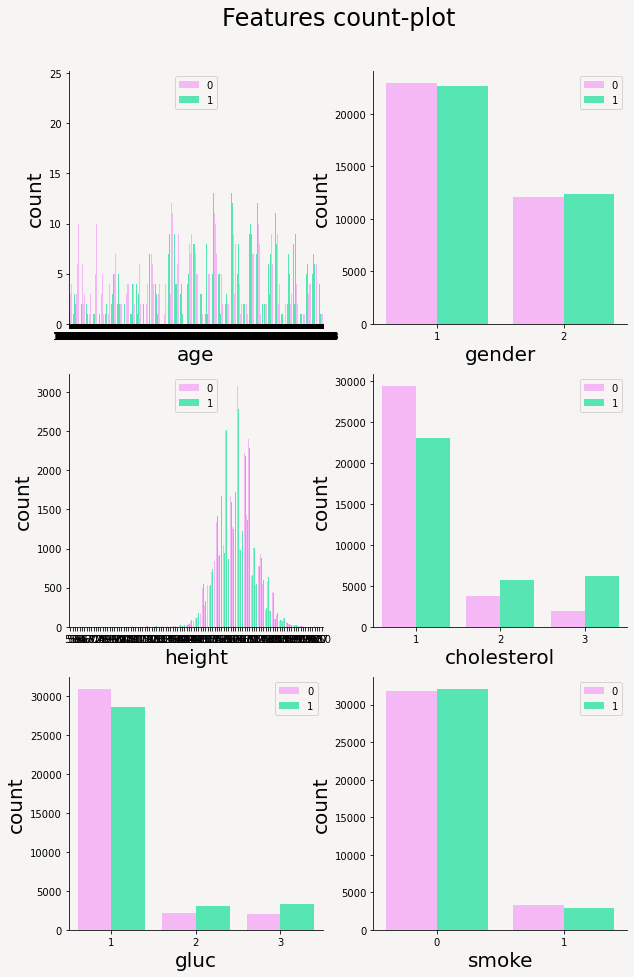

In [12]:
num = ['age', 'gender', 'height','cholesterol','gluc','smoke','active']
def hist_plot(df, num):    
    L = len(num)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(10, 15), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in num:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        g = sns.countplot(data=df, x=col, hue="cardio", palette=mypal[1::4])
        g.set_xlabel(col, fontsize=20)
        g.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        i = i +1

    plt.suptitle('Features count-plot' ,fontsize = 24)
    return 0

hist_plot(df, num[0:-1]);

# Features pairplot

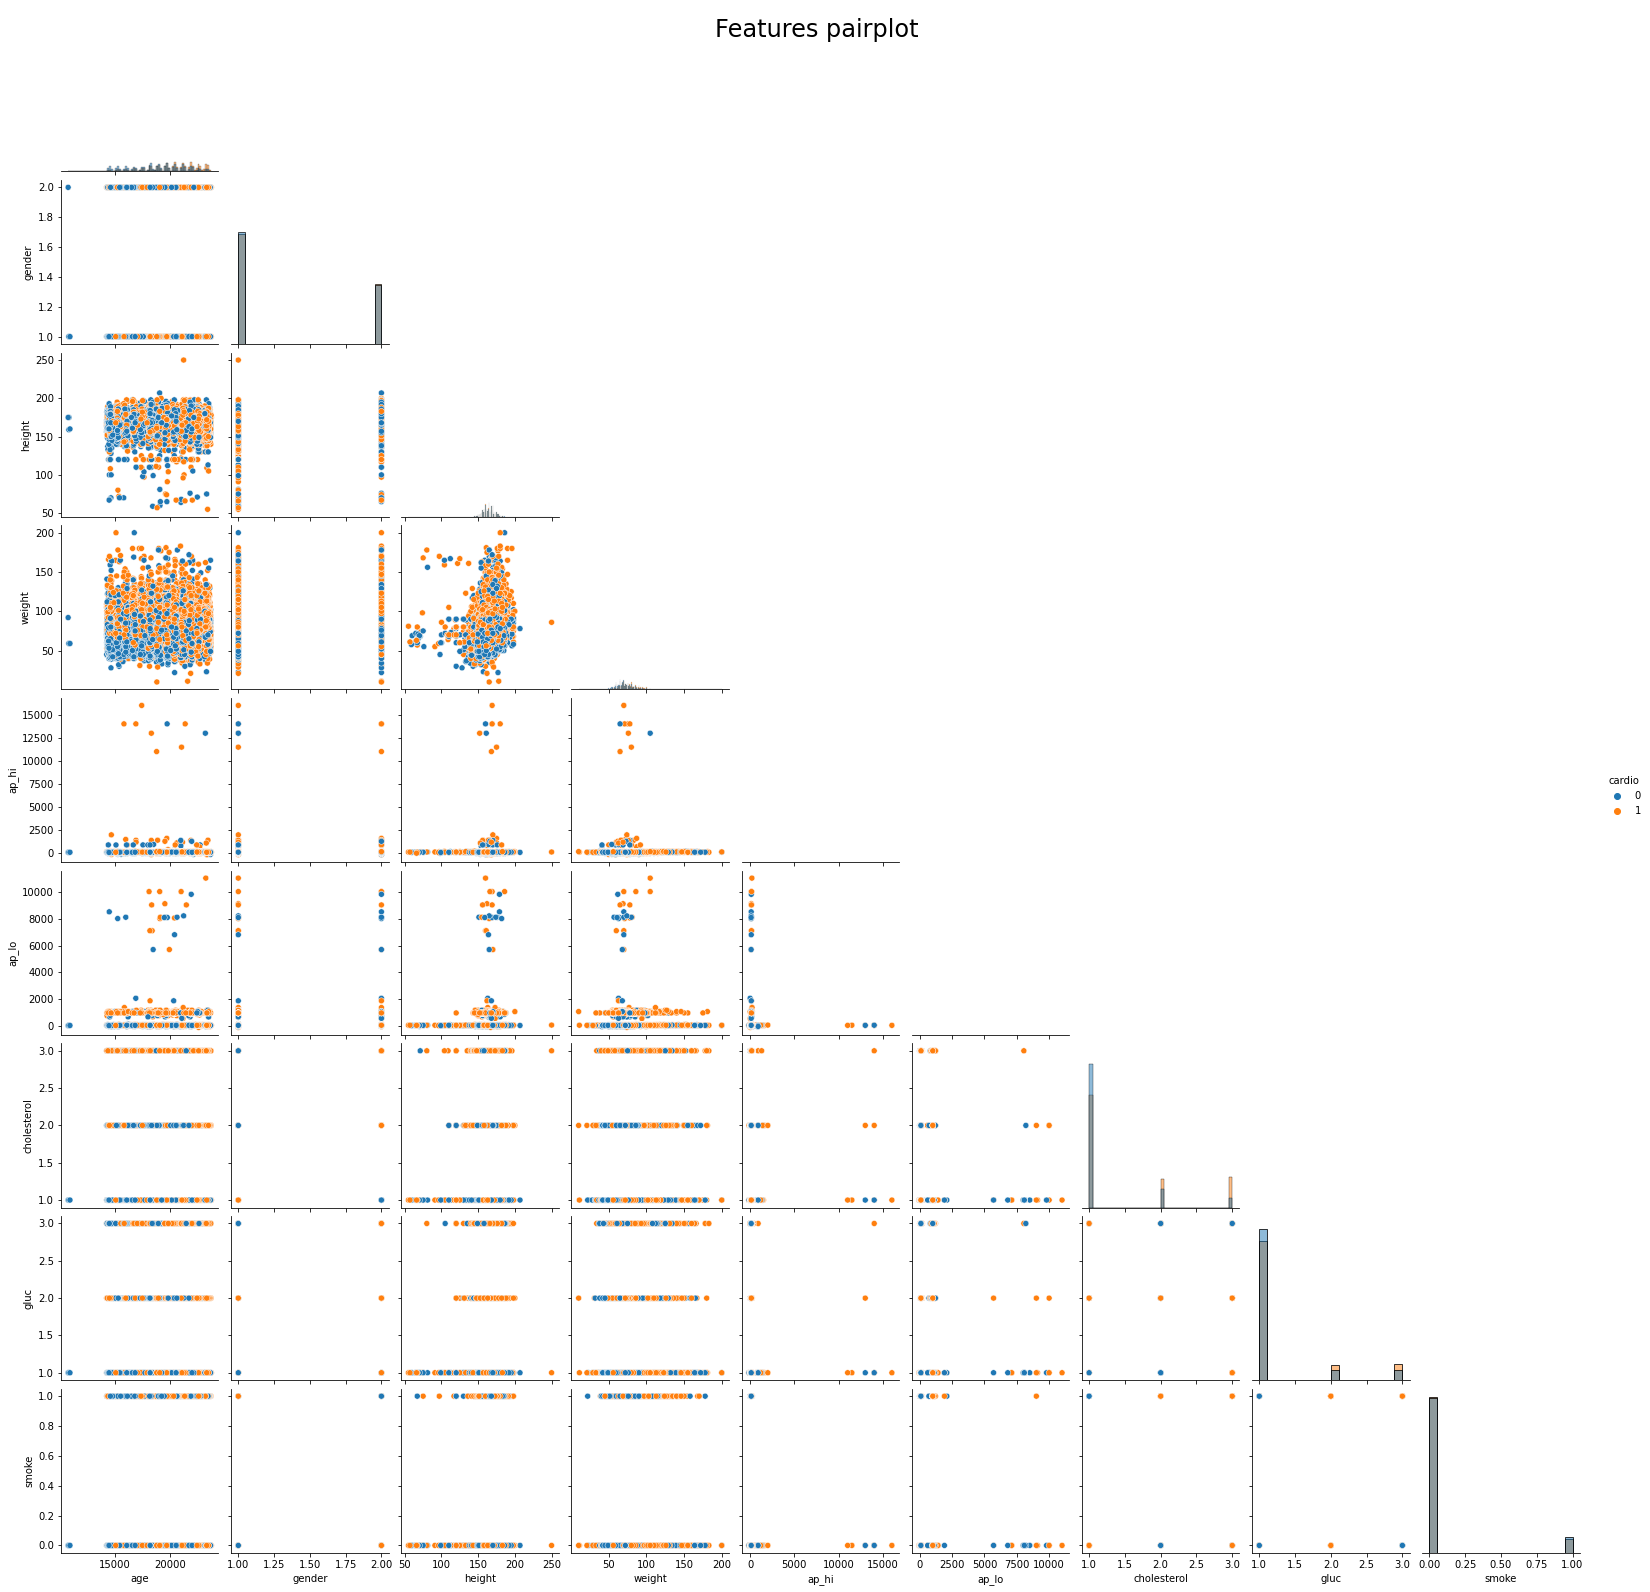

In [64]:
num_feats = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol','gluc','smoke','cardio']
data = df[num_feats]
g = sns.pairplot(data, hue="cardio", corner=True, diag_kind='hist')
plt.suptitle('Features pairplot' ,fontsize = 24);

# Reg plot of selected Feature

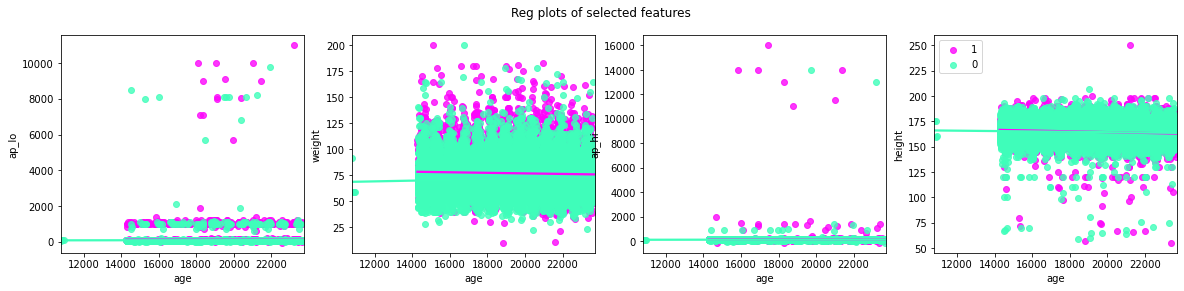

In [63]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=df[df['cardio'] ==1], x='age', y='ap_lo', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=df[df['cardio'] ==0], x='age', y='ap_lo', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=df[df['cardio'] ==1], x='age', y='weight', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=df[df['cardio'] ==0], x='age', y='weight', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=df[df['cardio'] ==1], x='age', y='ap_hi', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=df[df['cardio'] ==0], x='age', y='ap_hi', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=df[df['cardio'] ==1], x='age', y='height', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=df[df['cardio'] ==0], x='age', y='height', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

# Strip Plot Distribution Of Attributes Vs Cardio

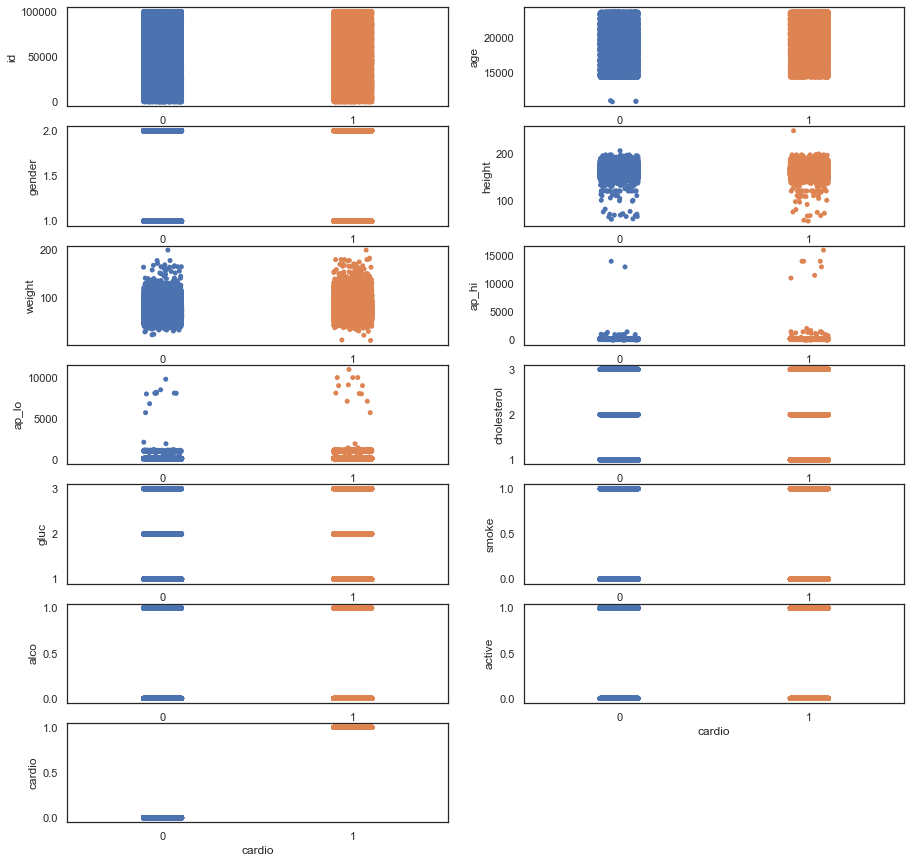

In [17]:
columns=df.columns

sns.set(rc={'figure.figsize':(15,15)})
j=1
sns.set_style(style='white')

for i in range(len(columns)):
    plt.subplot(7,2,j)
    sns.stripplot(x='cardio', y=columns[i] , data=df)
    j=j+1

# Correlations of each features in dataset

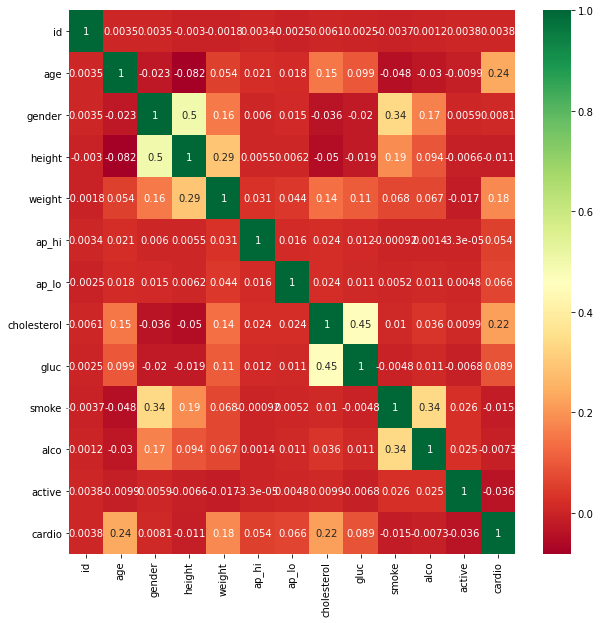

In [36]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="mako",center = 0)

Text(0.5, 1.0, 'Pairwise correlation matrix')

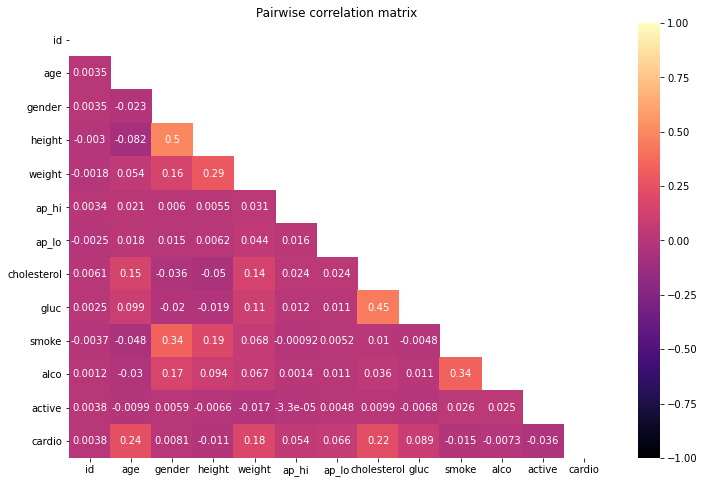

In [66]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 
plt.figure(figsize=(12,8))
sns.despine(top=True, right=True, bottom=True)
g1 = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1,annot=True, cmap="magma")
g1.set_title("Pairwise correlation matrix")

# Pair Plot

<Figure size 504x504 with 0 Axes>

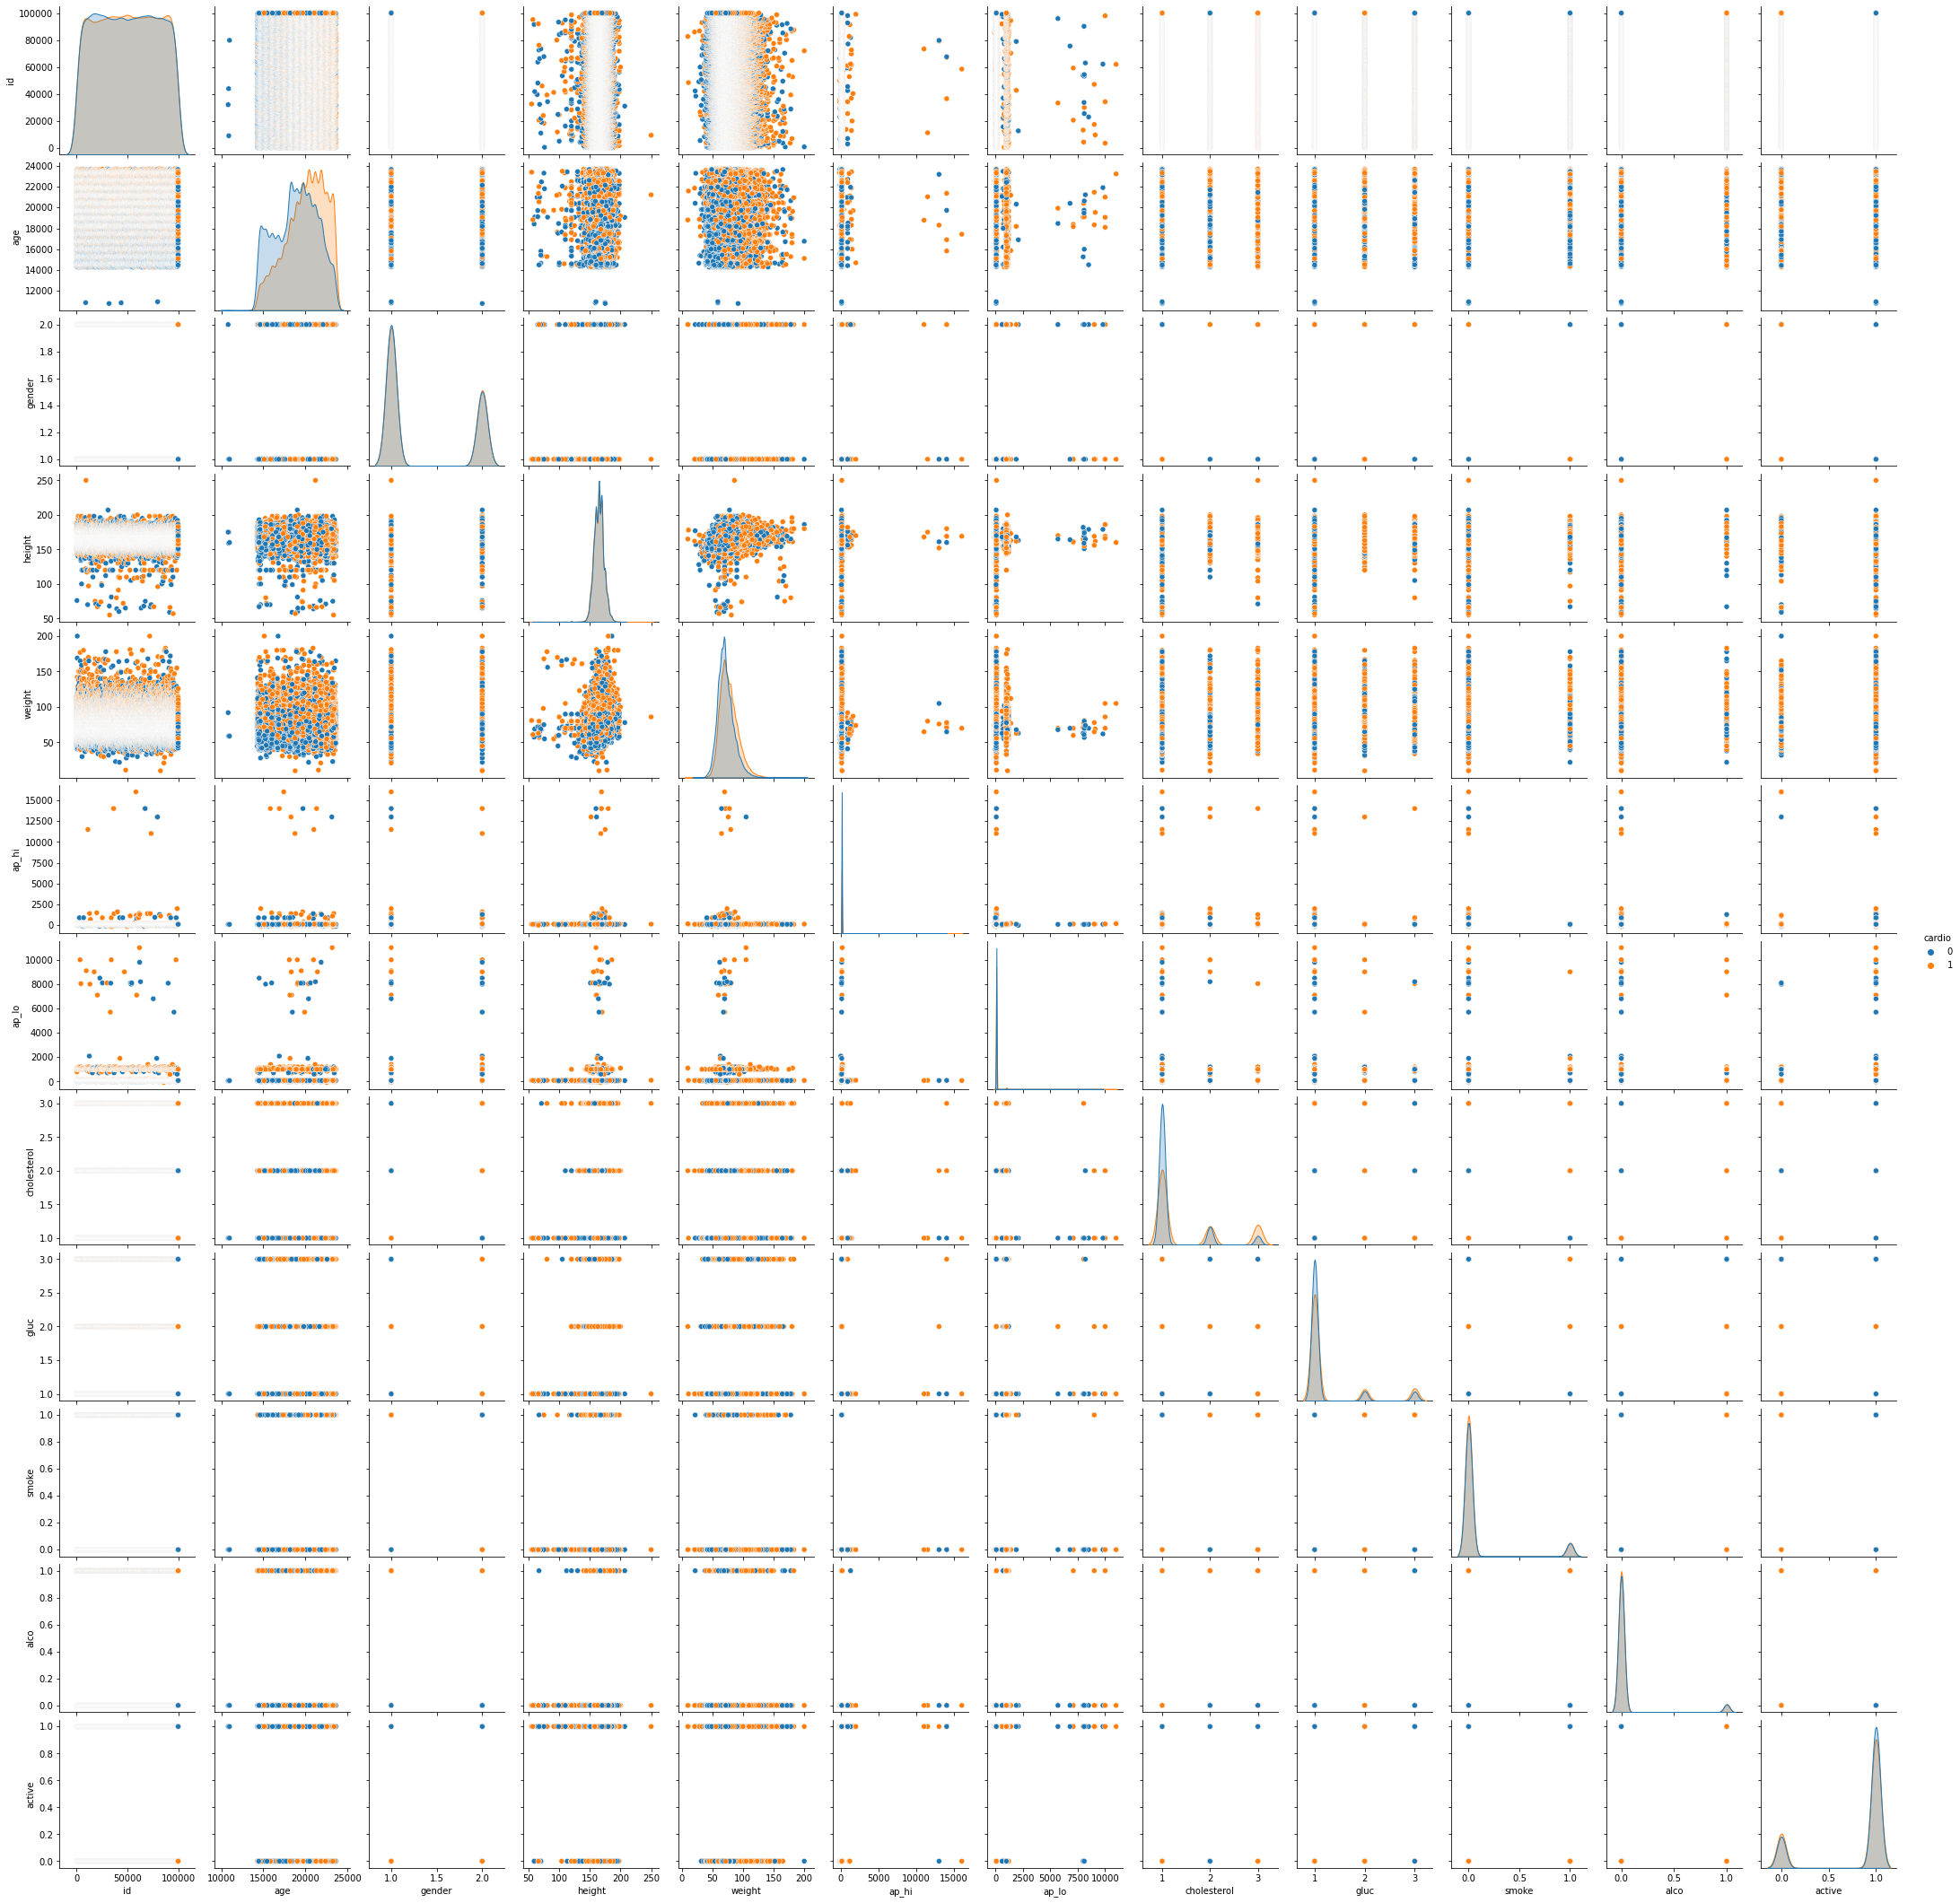

In [53]:
plt.figure(figsize = (7,7))
sns.pairplot(df, hue='cardio')
plt.show()

# Data preprocessing


Separate dependent and independent variable

In [6]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
x,y

(          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
 0          0  18393       2     168    62.0    110     80            1     1   
 1          1  20228       1     156    85.0    140     90            3     1   
 2          2  18857       1     165    64.0    130     70            3     1   
 3          3  17623       2     169    82.0    150    100            1     1   
 4          4  17474       1     156    56.0    100     60            1     1   
 ...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
 69995  99993  19240       2     168    76.0    120     80            1     1   
 69996  99995  22601       1     158   126.0    140     90            2     2   
 69997  99996  19066       2     183   105.0    180     90            3     1   
 69998  99998  22431       1     163    72.0    135     80            1     2   
 69999  99999  20540       1     170    72.0    120     80            2     1   
 
        smoke  alco  activ

# Feature Importance

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

In [8]:
model = ExtraTreesClassifier()

In [9]:
model.fit(x,y)

ExtraTreesClassifier()

In [10]:
model.feature_importances_

array([0.16003015, 0.20559109, 0.00556564, 0.13539561, 0.14840238,
       0.17010015, 0.10350276, 0.0463671 , 0.01171055, 0.00433482,
       0.00452658, 0.00447316])

In [11]:
top = pd.Series(model.feature_importances_,index = x.columns)
top

id             0.160030
age            0.205591
gender         0.005566
height         0.135396
weight         0.148402
ap_hi          0.170100
ap_lo          0.103503
cholesterol    0.046367
gluc           0.011711
smoke          0.004335
alco           0.004527
active         0.004473
dtype: float64

<AxesSubplot:>

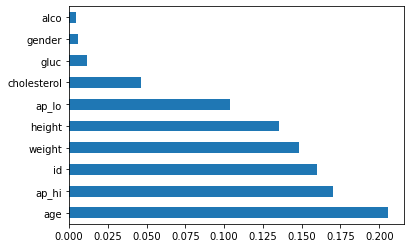

In [12]:
top.nlargest(10).plot(kind = 'barh')

# Feature Selection

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fit_feature = SelectKBest(score_func=f_classif)

In [14]:
fit_feature.fit(x,y)

SelectKBest()

In [15]:
score_col = pd.DataFrame(fit_feature.scores_,columns =['score value'])
score_col

,score value
0,1.010461
1,4209.007957
2,4.603641
3,8.197397
4,2388.777887
5,208.339524
6,303.629011
7,3599.361137
8,562.772977
9,16.790541


In [16]:
name_col = pd.DataFrame(x.columns)

In [17]:
top_feature = pd.concat([name_col,score_col],axis=1)
top_feature

,0,score value
0,id,1.010461
1,age,4209.007957
2,gender,4.603641
3,height,8.197397
4,weight,2388.777887
5,ap_hi,208.339524
6,ap_lo,303.629011
7,cholesterol,3599.361137
8,gluc,562.772977
9,smoke,16.790541


In [18]:
top_feature.nlargest(8,'score value')

,0,score value
1,age,4209.007957
7,cholesterol,3599.361137
4,weight,2388.777887
8,gluc,562.772977
6,ap_lo,303.629011
5,ap_hi,208.339524
11,active,89.091494
9,smoke,16.790541


In [19]:
x = df.drop(['smoke','gender'],axis=1)

In [20]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

# Split Data set

In [22]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .40,random_state=1)

# Feature Scaling

In [23]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [24]:
xtrain,xtest

(array([[ 1.18494273, -1.01756641, -0.73475961, ..., -0.31150504,
         -0.24058515,  0.4963142 ],
        [-1.23386984,  0.44160768, -0.73475961, ..., -0.31150504,
         -0.24058515,  0.4963142 ],
        [-0.25925201,  0.78603922, -0.73475961, ..., -0.31150504,
         -0.24058515,  0.4963142 ],
        ...,
        [-0.67874164, -0.5726419 ,  1.36098935, ..., -0.31150504,
         -0.24058515,  0.4963142 ],
        [ 0.73888114,  1.01093275, -0.73475961, ..., -0.31150504,
         -0.24058515, -2.01485269],
        [-1.48625137,  0.48982809, -0.73475961, ..., -0.31150504,
         -0.24058515,  0.4963142 ]]),
 array([[-1.4124751 , -1.36280837, -0.73475961, ..., -0.31150504,
         -0.24058515,  0.4963142 ],
        [ 0.71547002, -2.03627333, -0.73475961, ..., -0.31150504,
         -0.24058515,  0.4963142 ],
        [ 0.77497038,  0.1526904 , -0.73475961, ..., -0.31150504,
         -0.24058515,  0.4963142 ],
        ...,
        [ 0.67441374,  0.14580177,  1.36098935, ...,  

# RandomForestClassifier

In [25]:
rfc = RandomForestClassifier()

In [26]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [27]:
RFC_train = rfc.score(xtrain,ytrain)
RFC_train

1.0

In [28]:
RFC_test = rfc.score(xtest,ytest)
RFC_test

0.7249285714285715

In [46]:
y_pred_rfc = rfc.predict(xtest)
accuracy_score(ytest,y_pred_rfc)

0.7254285714285714

In [47]:
confusion_matrix(ytest,y_pred_rfc)

array([[10463,  3336],
       [ 4352,  9849]], dtype=int64)

In [48]:
print(classification_report(ytest,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73     13799
           1       0.75      0.69      0.72     14201

    accuracy                           0.73     28000
   macro avg       0.73      0.73      0.73     28000
weighted avg       0.73      0.73      0.73     28000



# LogisticRegression

In [49]:
log =LogisticRegression()

In [50]:
log.fit(xtrain,ytrain)

LogisticRegression()

In [51]:
LOG_train = log.score(xtrain,ytrain)
LOG_train

0.7219285714285715

In [52]:
LOG_test = log.score(xtest,ytest)
LOG_test

0.7178571428571429

In [53]:
y_pred_log = log.predict(xtest)
accuracy_score(ytest,y_pred_log)

0.7178571428571429

In [54]:
confusion_matrix(ytest,y_pred_log)

array([[10657,  3142],
       [ 4758,  9443]], dtype=int64)

In [55]:
print(classification_report(ytest,y_pred_log))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73     13799
           1       0.75      0.66      0.71     14201

    accuracy                           0.72     28000
   macro avg       0.72      0.72      0.72     28000
weighted avg       0.72      0.72      0.72     28000





# Naive Bayes bernoulli

In [56]:
bnb = BernoulliNB()

In [57]:
bnb.fit(xtest,ytest)

BernoulliNB()

In [58]:
BNB_train = bnb.score(xtrain,ytrain)
BNB_train

0.717

In [59]:
BNB_test = bnb.score(xtest,ytest)
BNB_test

0.7190357142857143

In [60]:
y_pred_bnb = bnb.predict(xtest)
accuracy_score(ytest,y_pred_bnb)

0.7190357142857143

In [61]:
confusion_matrix(ytest,y_pred_bnb)

array([[10544,  3255],
       [ 4612,  9589]], dtype=int64)

In [62]:
print(classification_report(ytest,y_pred_bnb))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73     13799
           1       0.75      0.68      0.71     14201

    accuracy                           0.72     28000
   macro avg       0.72      0.72      0.72     28000
weighted avg       0.72      0.72      0.72     28000



# K-nearest Neighbor Classifier

In [63]:
knnc = KNeighborsClassifier()

In [64]:
knnc.fit(xtest,ytest)

KNeighborsClassifier()

In [65]:
KNNC_train = knnc.score(xtrain,ytrain)
KNNC_train

0.6174285714285714

In [66]:
KNNC_test = knnc.score(xtest,ytest)
KNNC_test

0.7471785714285715

In [67]:
y_pred_knnc = knnc.predict(xtest)
accuracy_score(ytest,y_pred_knnc)

0.7471785714285715

In [68]:
con_mat_knnc = confusion_matrix(ytest,y_pred_knnc)
con_mat_knnc

array([[10384,  3415],
       [ 3664, 10537]], dtype=int64)

In [71]:
print(classification_report(ytest,y_pred_knnc))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75     13799
           1       0.76      0.74      0.75     14201

    accuracy                           0.75     28000
   macro avg       0.75      0.75      0.75     28000
weighted avg       0.75      0.75      0.75     28000



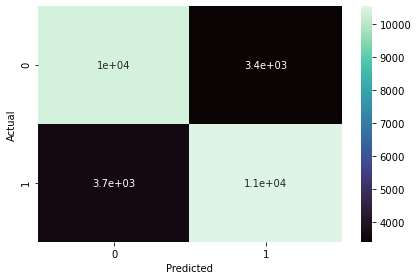

In [72]:
sns.heatmap(pd.DataFrame(con_mat_knnc), annot=True, cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# Gradient Boosting

In [73]:
gb = GradientBoostingClassifier()

In [74]:
gb.fit(xtest,ytest)

GradientBoostingClassifier()

In [75]:
GB_train = gb.score(xtrain,ytrain)
GB_train

0.7356904761904762

In [76]:
GB_test = gb.score(xtest,ytest)
GB_test

0.7403214285714286

In [77]:
y_pred_gb = gb.predict(xtest)
accuracy_score(ytest,y_pred_gb)

0.7403214285714286

In [78]:
 confusion_matrix(ytest,y_pred_gb)


array([[10605,  3194],
       [ 4077, 10124]], dtype=int64)

In [79]:
print(classification_report(ytest,y_pred_gb))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74     13799
           1       0.76      0.71      0.74     14201

    accuracy                           0.74     28000
   macro avg       0.74      0.74      0.74     28000
weighted avg       0.74      0.74      0.74     28000



# ROC Curve

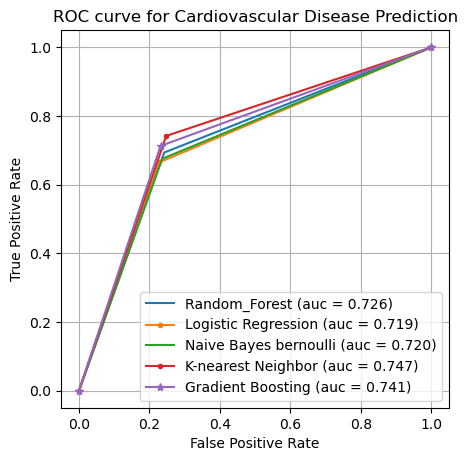

In [82]:
rfc_fpr, rfc_tpr, threshold = roc_curve(ytest,y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

log_fpr, log_tpr, threshold = roc_curve(ytest,y_pred_log)
auc_log = auc(log_fpr, log_tpr)

bnb_fpr, bnb_tpr, threshold = roc_curve(ytest, y_pred_bnb)
auc_bnb = auc(bnb_fpr, bnb_tpr)

knnc_fpr, knnc_tpr, threshold = roc_curve(ytest, y_pred_knnc)
auc_knnc = auc(knnc_fpr, knnc_tpr)

gb_fpr, gb_tpr, threshold = roc_curve(ytest, y_pred_gb)
auc_gb = auc(gb_fpr, gb_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='Random_Forest (auc = %0.3f)' % auc_rfc)
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic Regression (auc = %0.3f)' % auc_log)
plt.plot(bnb_fpr, bnb_tpr, linestyle='-', label='Naive Bayes bernoulli (auc = %0.3f)' % auc_bnb)
plt.plot(knnc_fpr, knnc_tpr, marker='.', label='K-nearest Neighbor (auc = %0.3f)' % auc_knnc)
plt.plot(gb_fpr, gb_tpr, marker='*', label='Gradient Boosting (auc = %0.3f)' % auc_gb)


plt.title('ROC curve for Cardiovascular Disease Prediction')
#plt.xlabel('False positive rate (1-Specificity)')
#plt.ylabel('True positive rate (Sensitivity)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.grid(True)
plt.show()

# Final Result

In [83]:
data = [('Random Forest Classifier', RFC_train,RFC_test,),
 (' K-nearest Neighbor Classifier', KNNC_train,KNNC_test),
('Bernoulli Naive Bayes',BNB_train,BNB_test),
 ('Logistic Regression', LOG_train,LOG_test ),
('Gradient Boosting', GB_train,GB_test)]

Scores_ =pd.DataFrame(data = data, columns=['Model Name','Train Accuracy', 'Test Accuracy'])

Scores_.set_index('Model Name', inplace = True)

Scores_


,Train Accuracy,Test Accuracy
Model Name,,
Random Forest Classifier,1.000000,0.725429
K-nearest Neighbor Classifier,0.617429,0.747179
Bernoulli Naive Bayes,0.717000,0.719036
Logistic Regression,0.721929,0.717857
Gradient Boosting,0.735690,0.740321


# Py Chart Of Final Result

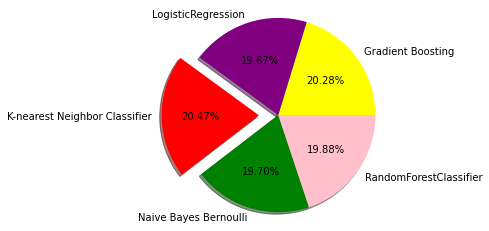

In [85]:
import matplotlib.pyplot as plt
Algorithm=["Gradient Boosting","LogisticRegression","K-nearest Neighbor Classifier","Naive Bayes Bernoulli","RandomForestClassifier"]
algo=[GB_test,LOG_test,KNNC_test, BNB_test, RFC_test]
plt.pie(algo,explode=[0,0,0.2,0,0],labels=Algorithm,shadow =True, autopct="%.2f%%",colors=['yellow','purple','red','green','pink'])
plt.axis("equal")
plt.show()

# K-fold cross validation Score

In [56]:
from sklearn.model_selection import cross_val_score

In [70]:
cv_score_rfc = cross_val_score(rfc,xtrain,ytrain,cv=10)
cv_score_rfc

array([0.72571429, 0.72404762, 0.72880952, 0.71904762, 0.71547619,
       0.72761905, 0.725     , 0.7302381 , 0.72904762, 0.71404762])

In [72]:
print("RandomForestClassifier K-fold cross validation Score : ",cv_score_rfc.mean())

RandomForestClassifier K-fold cross validation Score :  0.7239047619047619


In [61]:
cv_score_log = cross_val_score(log,xtrain,ytrain,cv=10)
cv_score_log

array([0.72214286, 0.72380952, 0.71928571, 0.72      , 0.71880952,
       0.71857143, 0.71142857, 0.72690476, 0.73071429, 0.72071429])

In [62]:
print("LogisticRegression K-fold cross validation Score : ",cv_score_log.mean())

LogisticRegression K-fold cross validation Score :  0.7212380952380952


In [63]:
cv_score_bnb = cross_val_score(bnb,xtrain,ytrain,cv=10)
cv_score_bnb

array([0.72190476, 0.70833333, 0.705     , 0.70738095, 0.71047619,
       0.71047619, 0.6997619 , 0.7152381 , 0.71285714, 0.7047619 ])

In [64]:
print("Naive Bayes bernoulli K-fold cross validation Score : ",cv_score_bnb.mean())

Naive Bayes bernoulli K-fold cross validation Score :  0.7096190476190476


In [65]:
cv_score_knnc = cross_val_score(knnc,xtrain,ytrain,cv=10)
cv_score_knnc

array([0.6247619 , 0.6252381 , 0.61      , 0.61285714, 0.62880952,
       0.63333333, 0.62166667, 0.62380952, 0.6252381 , 0.61857143])

In [66]:
print("K-nearest Neighbor Classifier K-fold cross validation Score : ",cv_score_knnc.mean())

K-nearest Neighbor Classifier K-fold cross validation Score :  0.6224285714285714


In [67]:
cv_score_gb = cross_val_score(gb,xtrain,ytrain,cv=10)
cv_score_gb

array([0.74261905, 0.73238095, 0.73547619, 0.73285714, 0.73619048,
       0.7297619 , 0.73190476, 0.74214286, 0.74166667, 0.73      ])

In [68]:
print("Gradient Boosting K-fold cross validation Score : ",cv_score_gb.mean())

Gradient Boosting K-fold cross validation Score :  0.7355


# Voting Ensembles Accuracy Score

# Creating Ensembles

In [86]:
log_clf = LogisticRegression()
rfc_clf = RandomForestClassifier()
bnb_clf = BernoulliNB()
knnc_clf = KNeighborsClassifier()
gb_clf = GradientBoostingClassifier()

voting_clf_hard = VotingClassifier(
    estimators=[('log', log_clf),('rfc', rfc_clf),('bnb', bnb_clf),('knnc', knnc_clf),('gb', gb_clf) ],
    voting='hard')

voting_clf_soft = VotingClassifier(
    estimators=[('log', log_clf),('rfc', rfc_clf), ('bnb', bnb_clf),('knnc', knnc_clf),('gb', gb_clf)],
    voting='soft')

# Testing Ensembles

In [87]:
voting_clf_hard.fit(xtrain, ytrain)
voting_clf_soft.fit(xtrain, ytrain)

for clf in (log_clf,rfc_clf,bnb_clf,knnc_clf,gb_clf, voting_clf_hard,voting_clf_soft):
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    print(clf.__class__.__name__, accuracy_score(ytest, y_pred))
    a_row = pd.Series([clf.__class__.__name__, accuracy_score(ytest, y_pred)])
    row_df = pd.DataFrame([a_row])
    df = pd.concat([row_df, df], ignore_index=False)


LogisticRegression 0.7178571428571429
RandomForestClassifier 0.72425
BernoulliNB 0.7105357142857143
KNeighborsClassifier 0.6208214285714285
GradientBoostingClassifier 0.7353928571428572
VotingClassifier 0.7286785714285714
VotingClassifier 0.7283214285714286
